In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh.sampledata
from bokeh.io import vform
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.plotting import Figure, output_file, show


In [2]:
data='data for s1/2 to p3/2 transition 87 Rb'
amu=1.661*10**-27;
mu_b=9.74*10**-24;
k_b=1.381*10**-23;
e=1.602*10**-19;
m_e=9.109*10**-31;
mu_0=4*3.14*10**-7;
epsilon_0=8.854*10**-12;
h_c=1.055*10**-34;
h=6.626*10**-34;
c=2.998*10**8;
m_rb=87*amu;
decay=38.11*10**6;
lemda=780.032*10**-9;
life=26.24*10**-9;
i_sat=1.669;
f_goodness=.6;
v_recoil=(h_c*2*3.14)/(lemda*m_rb);
a_max=v_recoil*decay/2;

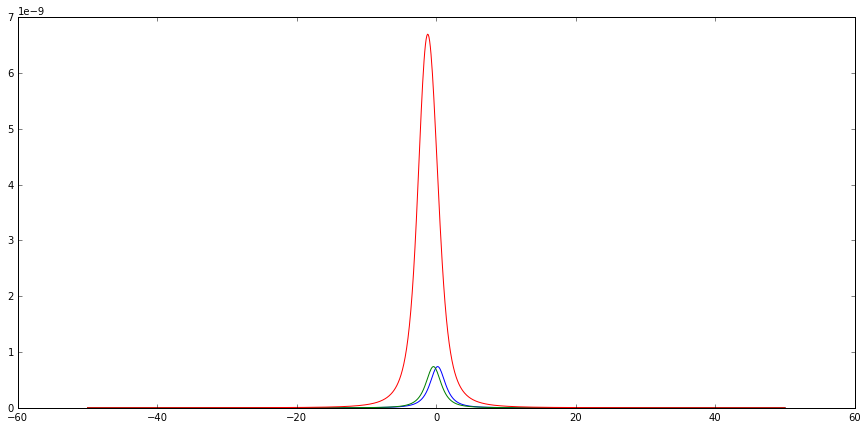

In [3]:
z=np.linspace(-50,50,1000)
r=1.7
j=2
p=.2
b1=[(mu_0*j*.5*.001*(r)**2)/np.sqrt((r**2+(zp-p)**2)**3) for zp in z]
b2=[(mu_0*j*.5*.001*(r)**2)/np.sqrt((r**2+(zp+p*2)**2)**3) for zp in z]
b3=[(mu_0*j*.5*.001*(r)**2)/np.sqrt((r**2+(zp+p*3)**2)**3) for zp in z]
b4=[(mu_0*j*.5*.001*(r)**2)/np.sqrt((r**2+(zp+p*4)**2)**3) for zp in z]
b5=[(mu_0*j*.5*.001*(r)**2)/np.sqrt((r**2+(zp+p*5)**2)**3) for zp in z]
b6=[(mu_0*j*.5*.001*(r)**2)/np.sqrt((r**2+(zp+p*6)**2)**3) for zp in z]
b7=[(mu_0*j*.5*.001*(r)**2)/np.sqrt((r**2+(zp+p*7)**2)**3) for zp in z]
b8=[(mu_0*j*.5*.001*(r)**2)/np.sqrt((r**2+(zp+p*8)**2)**3) for zp in z]
b9=[(mu_0*j*.5*.001*(r)**2)/np.sqrt((r**2+(zp+p*9)**2)**3) for zp in z]
b10=[(mu_0*j*.5*.001*(r)**2)/np.sqrt((r**2+(zp+p*10)**2)**3) for zp in z]
b11=[(mu_0*j*.5*.001*(r)**2)/np.sqrt((r**2+(zp+p*11)**2)**3) for zp in z]
plt.figure(figsize=(15,7))
plt.plot(z,np.array(b1))
plt.plot(z,np.array(b2))
plt.plot(z,np.array(b1)+np.array(b2)+np.array(b3)+np.array(b4)+np.array(b5)+np.array(b6)+np.array(b7)+np.array(b8)+np.array(b9)+np.array(b10)+np.array(b11))
plt.show()

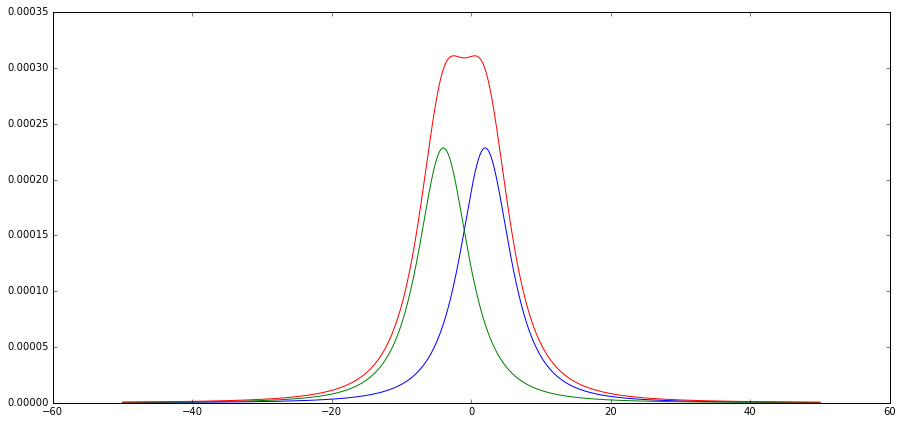

In [4]:
z=np.linspace(-50,50,1000)
r=5.5
j=2
p=2
b1=[(mu_0*j*.5*1000*(r)**2)/np.sqrt((r**2+(zp-p)**2)**3) for zp in z]
b2=[(mu_0*j*.5*1000*(r)**2)/np.sqrt((r**2+(zp+p*2)**2)**3) for zp in z]
plt.figure(figsize=(15,7))
plt.plot(z,np.array(b1))
plt.plot(z,np.array(b2))
plt.plot(z,np.array(b1)+np.array(b2))
plt.show()


In [5]:


%matplotlib inline
from scipy.special import ellipk, ellipe, ellipkm1
from numpy import pi, sqrt, linspace, log
from pylab import plot, xlabel, ylabel, suptitle, legend, show

uo = 4E-7*pi     # Permeability constant - units of H/m

# Compute G Factor from unitless parameters
def GFactorUnitless(a, b, g=0.0): # alpha, beta - omit gamma for central
    gpb2 = (g+b)*(g+b)
    gmb2 = (g-b)*(g-b)
    if not g == 0.0:
        sq = sqrt(1/(8*pi*b*(a*a-1)))
        t1 = (g+b)*log((a+sqrt(a*a+gpb2))/(1+sqrt(1+gpb2)))
        t2 = (g-b)*log((a+sqrt(a*a+gmb2))/(1+sqrt(1+gmb2)))
        B = sq*(t1-t2)
    else:
        sq = sqrt(b/2/pi/(a*a-1))
        B = sq*log((a+sqrt(a*a+b*b))/(1+sqrt(1+b*b)))
    return B
        
# Compute G Factor from all dimensions
def GFactor(r1, r2, l, x1=0.0, x2=0.0): # omit x1, x2 to compute central field
    a = r2/r1
    b = l/2/r1
    g = (x1+x2)/2/r1
    return GFactorUnitless(a, b, g)

# Compute B field on axis from unitless dimensions
def BFieldUnitless(power, packing, resistivity, r1, a, b, g=0.0):
    return uo*GFactorUnitless(a, b, g)*sqrt(power*packing/r1/resistivity)

# Compute B field on axis from actual dimensions (x is measurement point - center if none)
def BField(power, packing, resistivity, r1, r2, length, x=0.0): 
    a = r2/r1
    b = length/2/r1
    g = x/r1
    return BFieldUnitless(power, packing, resistivity, r1, a, b, g)



In [6]:
resistivity = 1.68E-8 # ohm-meter
r1 = 0.0125 # meter
packing = 0.75
power = 100.0 # watts
B = BFieldUnitless(power, packing, resistivity, r1, 3, 2)
print("B Field: {:.3} T".format(B))

B Field: 0.107 T


In [7]:


from ipywidgets import interactive
from IPython.display import display

def B(power, r1, r2, length, x):
    return "{:.3} T".format(BField(power, 0.75, resistivity, r1, r2, length, x))

v = interactive(B, 
    power=(0.0, 200.0, 1), 
    r1 = (0.01, 0.1, 0.0001),
    r2 = (0.02, 0.5, 0.0001),
    length = (0.01, 2, 0.01),
    x = (0.0, 4, 0.01))
display(v)



'7.68e-05 T'

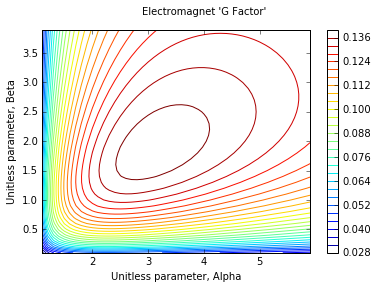

G Factor at A=3, B=2: 0.142
G Factor at A=3, B=1.9: 0.143


In [8]:


from pylab import pcolor, colorbar, meshgrid, contour
from numpy import arange
a = arange(1.1, 6.0, 0.1)
b = arange(0.1, 4.0, 0.1)
A, B = meshgrid(a,b)
G = GFactorUnitless(A, B)
contour(A, B, G, 30)
colorbar()
xlabel("Unitless parameter, Alpha")
ylabel("Unitless parameter, Beta")
suptitle("Electromagnet 'G Factor'")
show()
print("G Factor at A=3, B=2: {:.3}".format(GFactorUnitless(3,2)))
print("G Factor at A=3, B=1.9: {:.3}".format(GFactorUnitless(3,1.9)))

